# ACT CW2 Q1

__Q1 Objective:__

Process dataset using traditional machine learning techniques.

### Import Libraries

In [1]:
# import necessary libraries

import numpy as np # numpy
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for data visualisation

# machine learning libraries and models

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay

## 
> ## Preparing the Dataset

### Load in the data

Load in the data file (currently in csv file), add the data to a pandas dataframe, and inspect the dataframe to check that it has loaded in correctly.

In [224]:
# import the data file
# data is in the file "psion_upsilon.csv"

# read in the file and store it in a pandas dataframe
rawdata_df = pd.read_csv('psion_upsilon.csv')

In [225]:
# check the dataframe has loaded in correctly

# print the shape of the dataframe
print("Size of dataframe:")
print(rawdata_df.shape) # 40,000 rows x 22 columns
print(f"\n")

# print the column headings
print("Column headings:")
print(rawdata_df.columns)
print(f"\n")

# check top few rows of data
print("Top few rows of dataframe:")
print(rawdata_df.head)

Size of dataframe:
(40000, 22)


Column headings:
Index(['Unnamed: 0', 'Run', 'Event', 'type1', 'E1', 'px1', 'py1', 'pz1', 'pt1',
       'eta1', 'phi1', 'Q1', 'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2',
       'phi2', 'Q2', 'class'],
      dtype='object')


Top few rows of dataframe:
<bound method NDFrame.head of        Unnamed: 0     Run       Event type1       E1      px1      py1  \
0               0  167807  1101779335     G   5.8830   3.6101   2.3476   
1               1  167102   286049970     G  13.7492  -1.9921  11.8723   
2               2  160957   190693726     G   8.5523   1.4623   4.5666   
3               3  166033   518823971     G   7.5224   0.1682  -3.5854   
4               4  163589    49913789     G  12.4683   8.1310  -1.6633   
...           ...     ...         ...   ...      ...      ...      ...   
39995       39995  166033   460063858     G  21.1411  -9.3928  10.8857   
39996       39996  173692   573648364     G  29.4819  16.1461  21.9823   
39997       

### Remove Unnecessary Data Columns

The first 3 columns contain index, run number, and event number. These are used to track the data points, but they are not scientific parameters and should not be used as variables to determine output class.

In [226]:
# remove the first 3 columns
# by defining a new dataframe
# that only contains the relevant variables

# drop columns 0, 1, and 2
# so keep all rows, and columns 3-21
# (df.iloc indices are start inclusive and end exclusive)
reduced_df = rawdata_df.iloc[:, 3:]

# check the properites of the new dataframe are what we want
# print out the new shape and column headings

print("Size of reduced dataframe:")
print(reduced_df.shape)
# 40,000 rows x 19 columns

print(f"\n")
print("Column headings:")
print(reduced_df.columns)

# this is what we expect
# we have removed 'Unnamed (index)', 'Run', and 'Event'
# and kept all 40,000 samples


Size of reduced dataframe:
(40000, 19)


Column headings:
Index(['type1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'class'],
      dtype='object')


The decision tree classifier will not be able to process the variables 'type1' and 'type2', as these are non-numerical values. These columns tell us the type of the first and second muon, whether they are a global muon (G), or a tracker muon (T).

Before deciding what to do with these values, look at the proportion of each type that we have in the dataset.

In [227]:
# how many occurences of G and T in each 'type' column?
# look at 'type1' and 'type2'

# type1
print(reduced_df['type1'].value_counts()) # total freq of each value
print(reduced_df['type1'].value_counts(normalize=True)) # as a fraction of the total

print("\n") # space out the outputs

# type2
print(reduced_df['type2'].value_counts()) # total freq of each value
print(reduced_df['type2'].value_counts(normalize=True)) # as a fraction of the total

type1
G    40000
Name: count, dtype: int64
type1
G    1.0
Name: proportion, dtype: float64


type2
G    36121
T     3879
Name: count, dtype: int64
type2
G    0.903025
T    0.096975
Name: proportion, dtype: float64


The values in 'type1' are all global muons - all of the samples have a type1 value of 'G'. This variable will add nothing to our calculation, so it would be more efficient to simply remove this column.

In [228]:
# as G is 100% of the values in 'type1'
# rewrite the dataframe without this column
reduced_df = reduced_df.drop('type1', axis=1)

# check that this column is gone
print("New shape:")
print(reduced_df.shape) # 40000 x 18
print("\nNew column headings:")
print(reduced_df.columns)

# type1 column has been removed
# (only run this code cell once as we are overwriting a variable)

New shape:
(40000, 18)

New column headings:
Index(['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'type2', 'E2',
       'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'class'],
      dtype='object')


### One-Hot Encoding for Non-numerical Values

About 10% of the type2 values were 'T', so we cannot just remove this data. This variable may turn out to be significant in determining the class of the output muon. However, the decision tree classifier will not be able to handle non-numerical features.

There are multiple ways to do this:
- ____ encoding
- one-hot encoding
- dictionary vectorising ?

I will be using one-hot vectorisation as ____. Scikit-learn has a one hot encoding function but use get_dummies because _____

In [ ]:
# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder

# use one-hot encoding on just the type2 column
# use drop_first=False
# get a 2-column table with G and T headings
type2_onehot = pd.get_dummies(reduced_df['type2'])

# look at the dummy values table (dataframe)
print("Dummy Values (first few rows):")
print(type2_onehot.head)
print("\nShape:")
print(type2_onehot.shape) # 40000 x 2
print("\nColumns:")
print(type2_onehot.columns)

# if drop_first is set to True, we only get the second column, T

# now replace the 'type2' column in the features dataset
# with the G column from the dummy table

# reassign the column values directly
reduced_df['type2'] = type2_onehot['G']

# if you use get_dummies on the whole dataframe directly
# _________

# rename column as type2_G to make the meaning clearer
reduced_df.rename(columns={'type2' : 'type2_G'}, inplace=True)

# check that the dataframe has updated correctly
print("\nUpdated Dataframe:")
print("Shape:") # shape should not have changed
print(reduced_df.shape) # 40000 x 18
print("Updated headings:") # column name should have changed
print(reduced_df.columns)
print("First few rows:") # check the type2_G values are Boolean
print(reduced_df.head)

Dummy Values (first few rows):
<bound method NDFrame.head of            G      T
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
39995   True  False
39996   True  False
39997  False   True
39998   True  False
39999   True  False

[40000 rows x 2 columns]>

Shape:
(40000, 2)

Columns:
Index(['G', 'T'], dtype='object')

Updated Dataframe:
Shape:
(40000, 18)
Updated headings:
Index(['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'type2_G', 'E2',
       'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'class'],
      dtype='object')
First few rows:
<bound method NDFrame.head of             E1      px1      py1      pz1      pt1    eta1    phi1  Q1  \
0       5.8830   3.6101   2.3476   4.0069   4.3062  0.8314  0.5766  -1   
1      13.7492  -1.9921  11.8723  -6.6416  12.0382 -0.5270  1.7370   1   
2       8.5523   1.4623   4.5666   7.0809   4.7950  1.1818  1.2609   1   
3       7.5224   0.1682  -3.5854   6.6100

### Create Features matrix and Target array

Now the dataframe contains the data we want, and in the correct format for our machine learning algorithms. We can now split the data into features and labels (X and y).

In [160]:
# now that we have the data in the form we want
# rename the dataframe to make this clearer
features_df = reduced_df

# this dataframe contains our features and labels

In [162]:
# split into feature matrix and target array
# X and y

# the feature matrix contains the input data
# drop the 'class' column from the reduced dataframe
X_total = features_df.drop('class', axis=1)

# the target array is the information with which we want the data to be classified (the "label")
# this data is the end column of the features dataframe
y_total = features_df['class']

# check type and size of both X and y

print("X:")
print(type(X_total)) # pd dataframe
print(X_total.shape) # (40000, 17)

print("\ny")
print(type(y_total)) # pd series
print(y_total.shape) # (40000,)

# the features matrix has been split into the correct X and y arrays

X:
<class 'pandas.core.frame.DataFrame'>
(40000, 17)

y
<class 'pandas.core.series.Series'>
(40000,)


### (Move this code somewhere eventually)

In [ ]:
# move this cell somewhere else

# just out of curiosity
# how many occurences of J/psi and upsilon in 'class'

print(features_df['class'].value_counts())
print(features_df['class'].value_counts(normalize=True))

In [ ]:
# try producing another pairplot 
# same as before but with 75% less data points

# plotting all 18 features
# colour code the points using 'class'
sns.pairplot(training_df, hue='class')

## running this took 7m and 18s


# now try customising more with a pairgrid ?
# or stick with pairplot ?

#sns.pairplot(training_df, hue='class', corner=True, diag_kind='hist', height=1.5)
## running this takes 3m 9s

KeyboardInterrupt: 

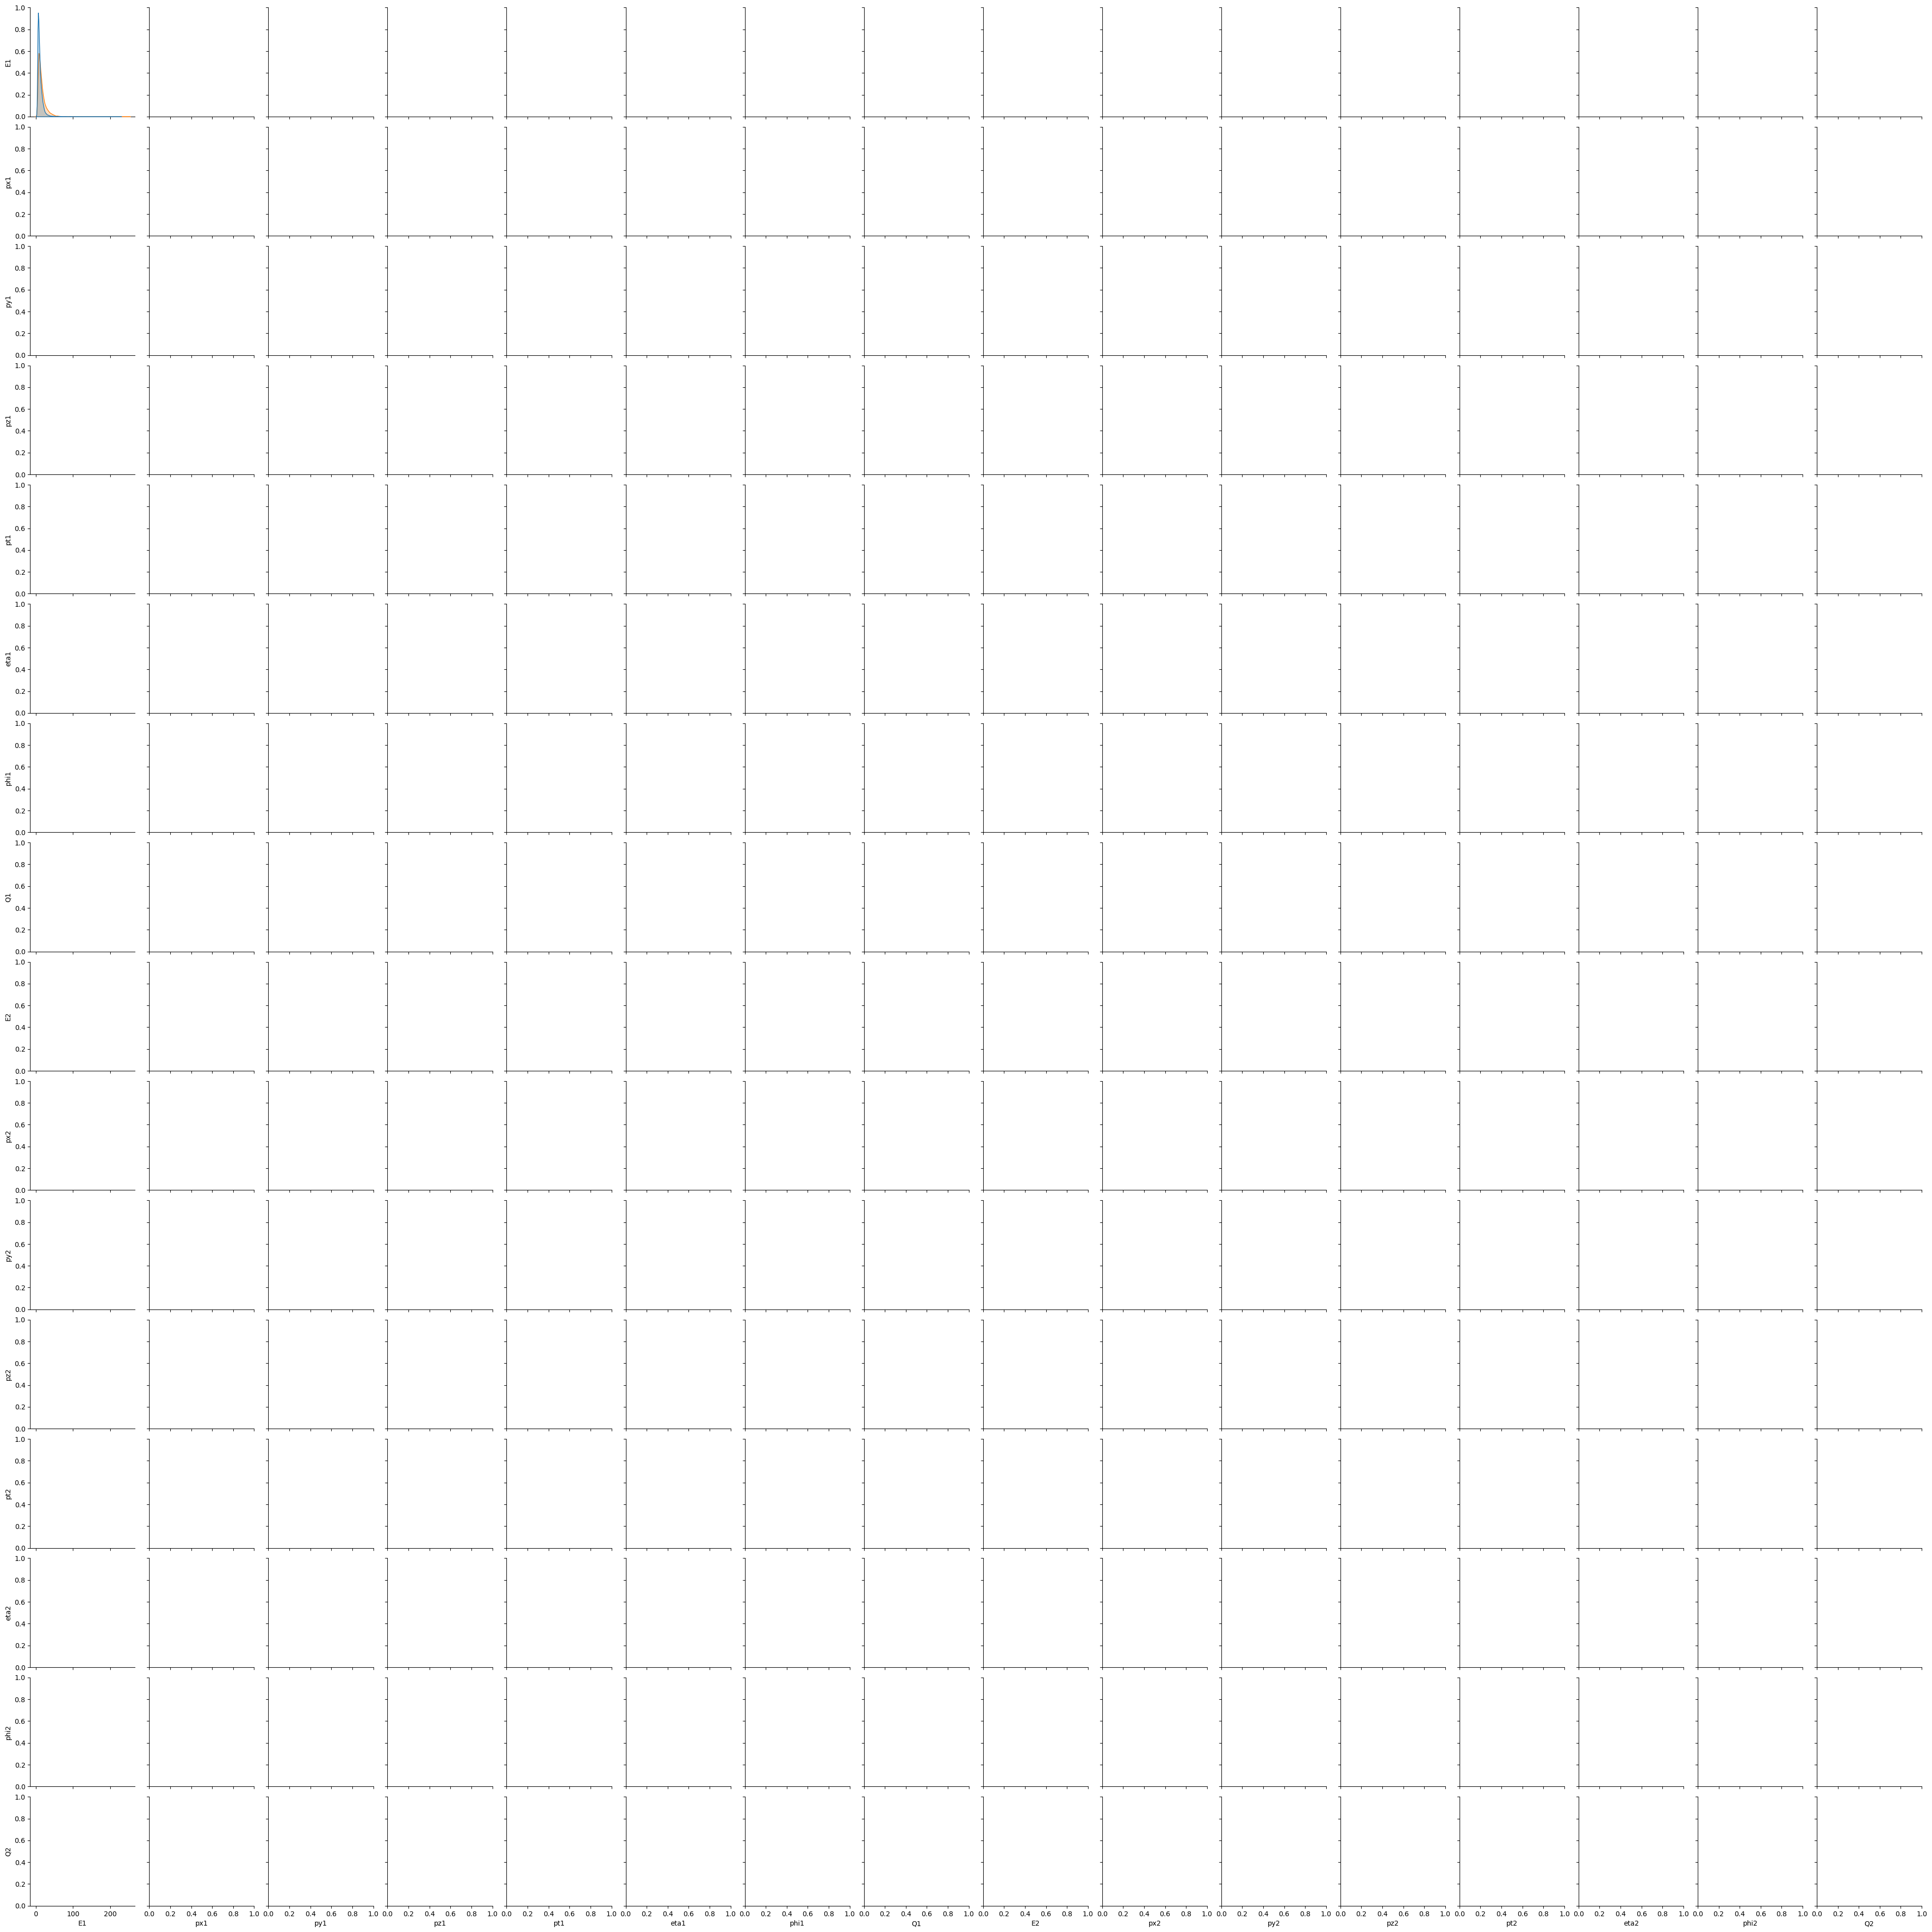

In [ ]:
# this plot could take some time
# plot all of the 18 features against each other
# colour code the points using 'class'

sns.pairplot(features_df, hue='class')

# this plot took 24m 40s to run
# so we will need to make this more efficient
# as it took so long to generate, keep this plot for now

# this plot is far too large
# do another pairplot with just the training data (25% of the total data)
# could also use pairgrid and play around with the parameters

one-hot encoding

In [ ]:
### One-Hot Encoding for Non-numerical Values (cut this down)

# test on just the series
# before messing with the dataframe

# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder
type2 = features_df['type2']
# check the variables and shape
print(type2.head)
print(type2.shape)

type2_onehot = pd.get_dummies(type2, drop_first=True)
# check the variables and shape
print(type2_onehot.head)
print(type2_onehot.shape)
# if no drop_first, we get 2 columns, with headings G and T

#print(type2.head)

In [ ]:
# now try one-hot encoding directly on the dataframe

# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder

print(features_df.head)
# check the variables and shape
print(features_df.head)
print(features_df.shape)
print(features_df.columns)

# do the actual encoding
features_onehot_df = pd.get_dummies(features_df, columns=['type2'], drop_first=True)

# check the variables and shape
print(features_onehot_df.head)
print(features_onehot_df.shape)
print(features_onehot_df.columns)
# if no drop_first, we get 2 columns, with headings G and T

# replaces the type2 (G/T) column with type2_t (True/False)
# but moves the type2_T column to the end of the table

In [ ]:
# third attempt
# do this on just the series
# # then replace the column in the dataframe

# need to change the 'type2' variables into numerical values
# using get_dummies - essentially a one-hot encoder

# one-hot encode on just the type2 column
# use drop_first=False
# get a 2-column table
type2_onehot = pd.get_dummies(features_df['type2'])

# check the original dataframe hasn't changed
print("Features Dataframe:")
print(features_df.shape)
print(features_df.columns)

# check the dummy values dataframe
print("\nDummy Values:")
print(type2_onehot.head)
print(type2_onehot.shape)
print(type2_onehot.columns)
# if no drop_first, we get 2 columns, with headings G and T

# now replace the 'type2' column in the features dataset
# with the G column from the dummy table
# and rename column as type2_G

#features_onehot_df = features_df.replace(to_replace=)
features_df['type2'] = type2_onehot['G']

# then rename this column
# to reflect the new Boolean values
features_df.rename(columns={'type2' : 'type2_G'}, inplace=True)

# check everything has updated correctly
print("\nFeatures Dataframe Updated:")
print(features_df.shape)
print(features_df.columns)
print(features_df.head)

The decision tree cannot handle variables 'type1' and 'type2', as they are non-numerical values. They are a binary classification system with a value of either 'G' or 'T'?

Firstly, count the frequencies of each one. If 99% of the data is type G, for instance, we could just consider this feature not very important.

Or, convert these variables to numerical values, using
- label encoder (not great as may infer correlations where there aren't any)
- one-hot encoder (currently the favourite)
- 

In [171]:
# end of code that needs to be sorted or removed

### Split into Test and Training data

We don't want to use all of our data points to train the model. We can split the full dataset into data used to train the model (training data) and data that we can use to analyse the effectiveness of the model once it has been trained (test data).

As there 40,000 samples, I will use 10,000 of them to train the model and the other 30,000 to test the model.

In [163]:
# use train_test_split to split the data
# allocate some of the data for training the model
# and the rest can be used to check its accuracy

# use 10,000 samples for training
# so train_size = 0.25

# use a random state integer for reproducible random shuffling

# split the data into 4 separate objects
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, train_size=0.25, random_state=13)

# check the sizes of the outputs

# training data
# should be 10,000 randomly selected samples
print("X_train:")
print(X_train.shape)
print("y_train:")
print(y_train.shape)
# 10000 x 17 and 10000 x 1

print(f"\n") # space between outputs

# test data
# should be the 30,000 remaining samples
print("X_test:")
print(X_test.shape)
print("y_test:")
print(y_test.shape)
# 30000 x 17 and 30000 x 1

# the arrays have been split randomly as specified in the function


X_train:
(10000, 17)
y_train:
(10000,)


X_test:
(30000, 17)
y_test:
(30000,)


### Plot the Training Data using PairPlot

Running a pairplot on the raw data would take far too long to generate (I tried it, it took 25 minutes). As we have a large number of samples and the training data has been randomly selected from the dataset, it is sufficient to plot this.

Using pairplot to see the relationships between each pair of features. Output class is shown by plot colour.

In [165]:
# to use pairplot, we need all of the training data in one dataframe
# concatenate along the columns
training_df = pd.concat([X_train, y_train], axis=1)

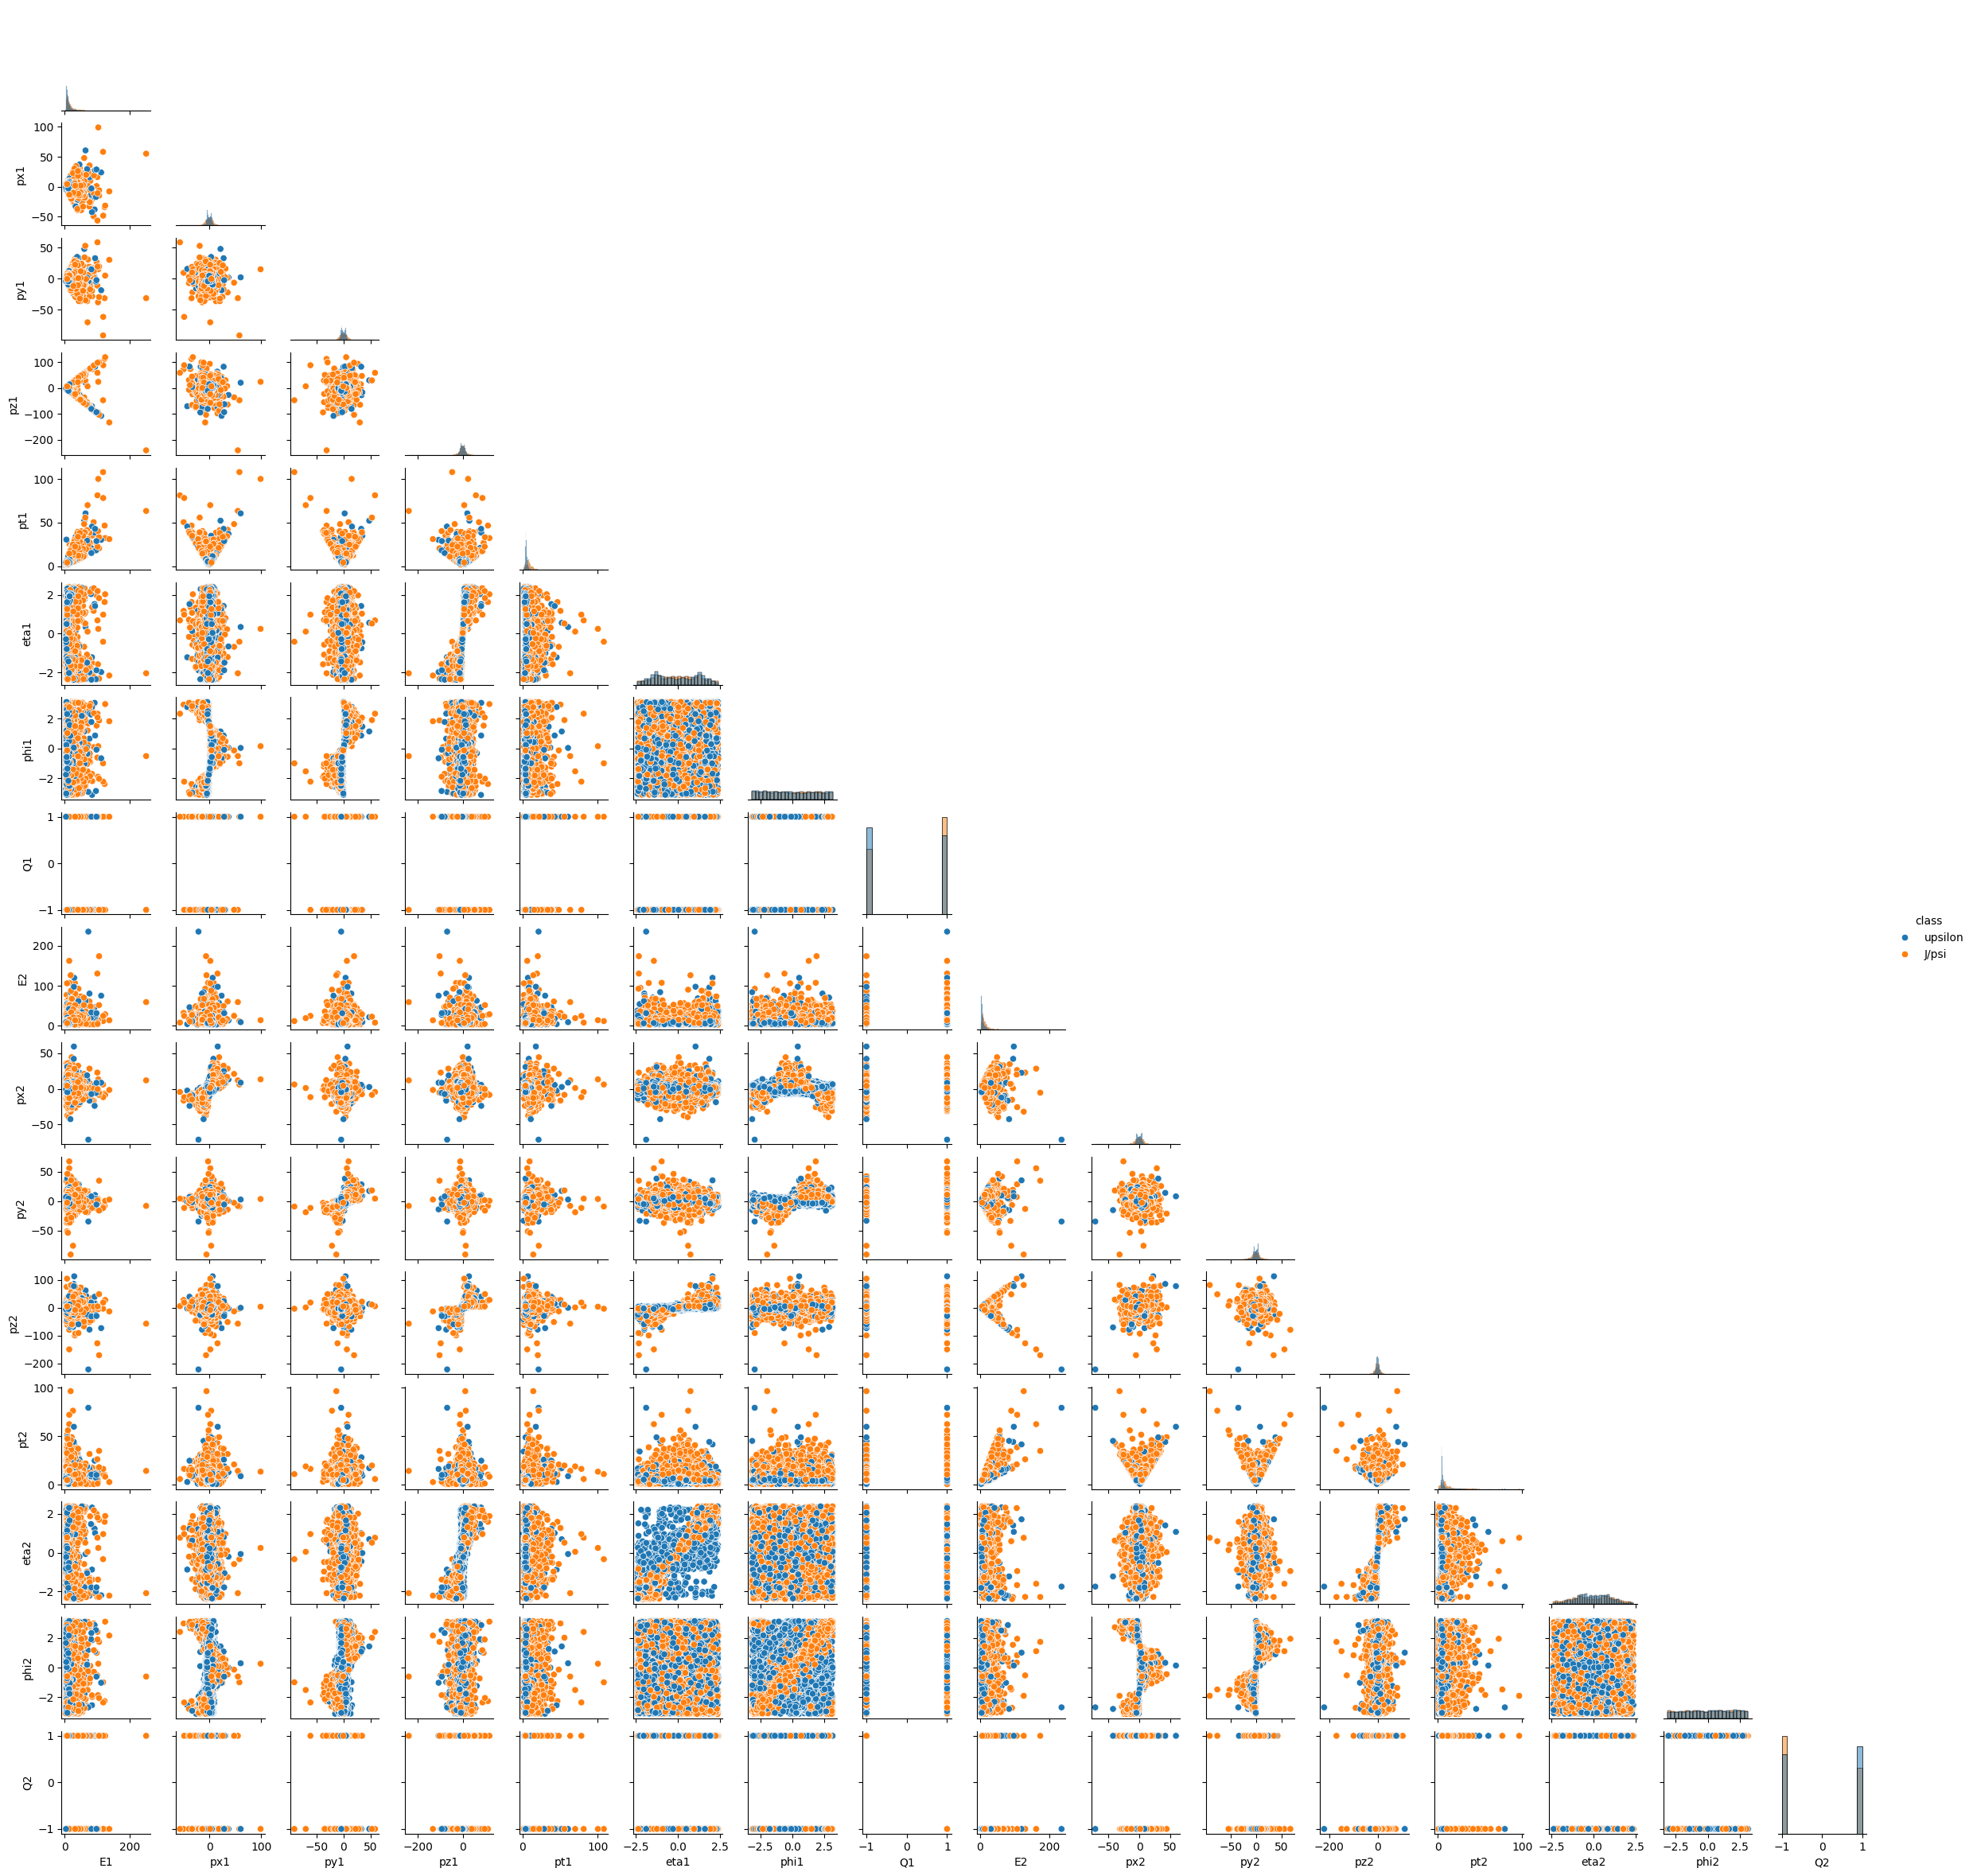

In [ ]:
# plotting all 18 features against each other using pairplot

# points are colour coded using 'class'

# set corner=True to only plot each pair of features once

# height=1.5 (measured in inches per subplot)
# any smaller is not very readable

# the diagonal plots are currently KDEs
# (Kernel Density Estimation plots)
# these plots are normalised so use a lot of computing power
# plot these as a histogram instead

sns.pairplot(training_df, hue='class', corner=True, diag_kind='hist', height=1.5)

Features of the pair plot - Is there anything we can infer from the data visualisation?

##   
> ## Preprocess the Data (Feature Engineering / Augmentation)

## 
> ## Train the Decision Tree Model

### Define and Fit a Decision Tree Classifier

In [169]:
# define a decision tree classifier for this dataset
dtc = tree.DecisionTreeClassifier()
# use the training data to train the classifier
dtc.fit(X_train, y_train)

# look at possible arguments for the DecisionTreeClassifier function

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Get Decision Tree parameters

Tree Parameters

Including: max depth, hyperparameters, number of leaf nodes.

In [184]:
# get some properties of the tree

# max depth of the tree
tree_depth = dtc.get_depth()
# number of leaves (final nodes in a branch)
n_leaves = dtc.get_n_leaves()
# model parameters
tree_params = dtc.get_params()

# can't print out the parameters directly
# tree_params is currently a dictionary object
# convert to a dataframe
# transpose using .T so we have 2 columns
params_df = pd.DataFrame([tree_params]).T

# print out these properties

# print max depth
print(f"Max depth: {tree_depth}")
# number of leaf nodes
print(f"Number of leaves: {n_leaves}")
# model parameters
# use display instead of print for dataframes
print("Model parameters:")
display(params_df) 

# now we have these parameters
# do we need to tweak any of the dtc inputs?

Max depth: 32
Number of leaves: 901
Model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


Model accuracy

Get accuracy for both training and test data. 

We expect the training accuracy to be 1 as the training data provided to the model is labelled, so the correct output class is provided. The test accuracy will be a better measure of the model accuracy, as this tests the model on unlabelled data and then compares it to the labels afterwards.

In [182]:
# get an accuracy score for the training data
train_acc = dtc.score(X_train, y_train)

# get score for the test data as well
test_acc = dtc.score(X_test, y_test)

# print both accuracy scores

# print the training accuracy
print(f"Training accuracy: {train_acc}")
# and the test accuracy
print(f"Test accuracy: {test_acc}")

# print both accuracies as percentages as well

print("\n") # space between outputs
print(f"Training accuracy: {train_acc*100: .1f} %")
print(f"Test accuracy: {test_acc*100: .1f} %")

# could mess around with the train/test split ratio
# to get a better accuracy

Training accuracy: 1.0
Test accuracy: 0.8525666666666667


Training accuracy:  100.0 %
Test accuracy:  85.3 %


In [183]:
# NUMERICAL PARAMETERS

# training accuracy
# test accuracy
# tree parameters
# max_depth

# can use attribute dtc.tree_

# predict the probability of a certain class
#prob_JPsi = dtc.predict_proba(......)
# what needs to go in the argument?
# do the same for prob_Upsilon

### Plot the Tree and Feature Importance

Plot the Decision Tree

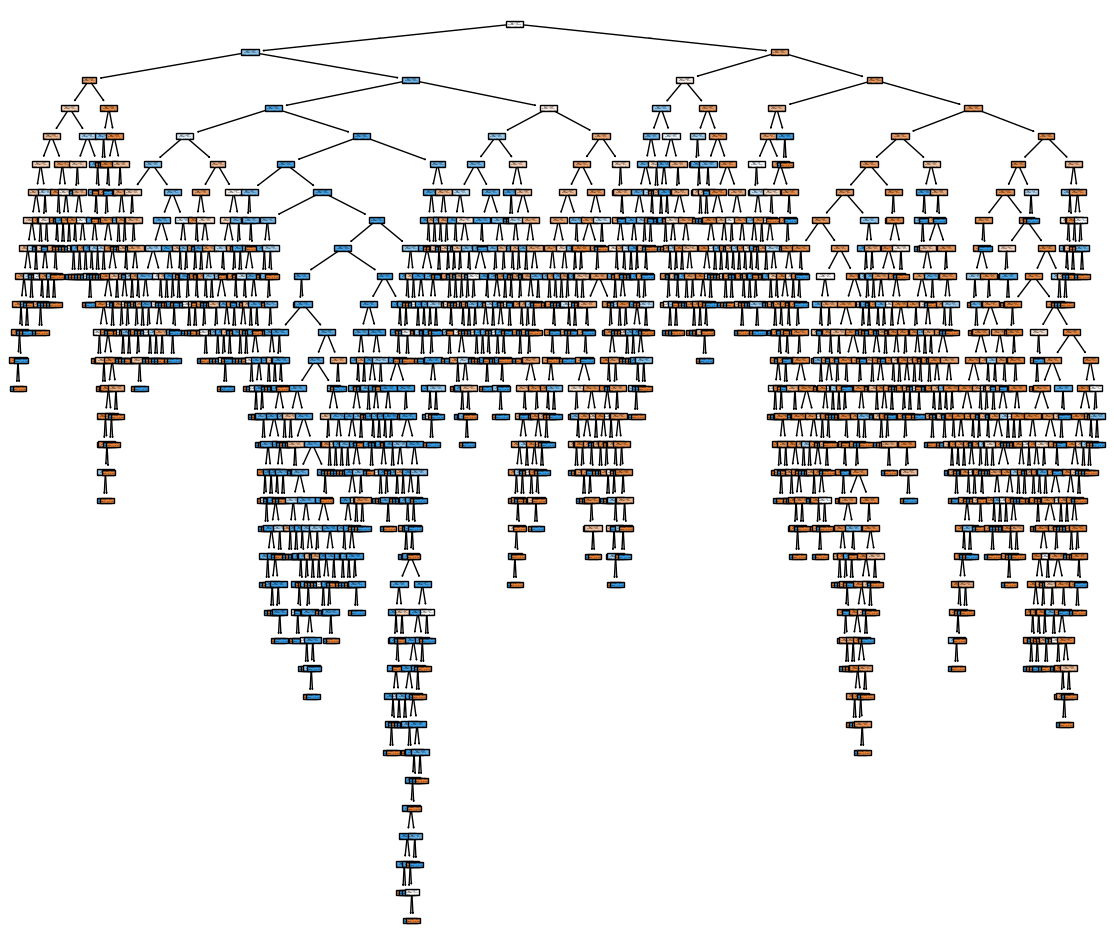

In [ ]:
# make the plot large enough to view the full tree
fig1 = plt.figure(figsize=(14,12))

# plot the decision tree in full
# filled nodes painted with class colours
# node sizes plotted proportionally
tree.plot_tree(dtc, filled=True, proportion=True)
# plot tree without all the text outputs
plt.show()

# this cell runs in ~50s

Plot Feature Importance

[0.05052725 0.04592327 0.04492803 0.02075446 0.32299474 0.04100985
 0.02996108 0.00073341 0.00259338 0.04195118 0.0430935  0.0453083
 0.0195928  0.21189145 0.0442683  0.03365126 0.00081774]


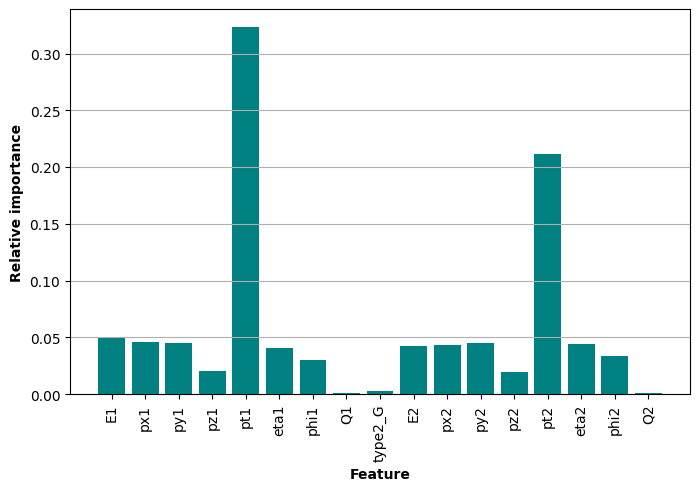

In [229]:
# get the feature importance data from the model
feat_imp = dtc.feature_importances_

print(feat_imp)

# feat_imp is a 1D numpy array with 17 elements
# corresponding to the 17 features of the dataset

# each element is the relative weight of the corresponding feature
# the elements of feat_imp add up to 1.0

# plot the importance of each feature

# define the figure size
fig2 = plt.figure(figsize=(8,5))

# number of features to plot along x axis
x = range(len(feat_imp))

# plot the relative importances as a bar graph
plt.bar(range(17), feat_imp, width=0.8, color='teal')

# set the labels for the x axis
# rotate labels so they are readable
plt.xticks(range(17), labels=X_total.columns, rotation='vertical')

# label the axes (in bold for readability)
plt.xlabel("Feature", fontweight='bold')
plt.ylabel("Relative importance", fontweight='bold')

# add horizontal gridlines
plt.grid(axis='y')
# display the figure
plt.show()

By far the most important features were the transverse momenta of each muon, pt1 and pt2. All of the other features have less than 5% importance except these 2 quantities, which have around 32% and 21% importance respectively.

The least important features are the charges of each muon, Q1 and Q2, and the type of the second muon, type2_G. We can infer that these properties have the least effect on the type of the outgoing meson.

Plot Decision Surfaces (maybe)

Maybe plot the decision surfaces just for the most important features ?

In [222]:
# try plotting one combination of features first
set = [0, 1]
pair = enumerate(set)

# model decided the decision boundaries based on the training data
# so use X_train and y_train for this

# take the corresponding 2 features from the dataset
X = X_train[:, pair]
y = y_train

print(X.head)
print(y.head)

InvalidIndexError: (slice(None, None, None), <enumerate object at 0x0000024AD1864450>)

In [ ]:
# PLOTS / VISUALISATION

# decision surfaces
# plot the decision boundaries
# will need to use
#from sklearn.inspection import DecisionBoundaryDisplay
# this will be multiple lines 
# and will probably need to loop over each pair of parameters

In [ ]:
# "Decision trees tend to overfit on data with a large number of features. 
# Getting the right ratio of samples to number of features is important, 
# since a tree with few samples in high dimensional space is very likely to overfit."

## 
> ## Ensemble Methods (Gradient Boosting / Random Forest)

__Next Steps:__
- change data loading function from csv-file to directly from Kaggle
- make notes on the pairplot and any noticeable features
- more feature engineering
- ensemble methods

### Links

* https://codefinity.com/courses/v2/47339f29-4722-4e72-a0d4-6112c70ff738/306bfbcf-d7b2-4979-a33a-3dee2744d31d/86a67d0a-a1ee-41b9-a35f-060398703814
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
* https://opendata.cern.ch/record/17
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.T.html
* https://pandas.pydata.org/docs/user_guide/merging.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
* https://scikit-learn.org/stable/modules/ensemble.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
* https://scikit-learn.org/stable/modules/tree.html
* https://seaborn.pydata.org/generated/seaborn.kdeplot
* https://seaborn.pydata.org/generated/seaborn.PairGrid.html
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://stackoverflow.com/questions/69733618/sklearn-tree-plot-tree-show-returns-chunk-of-text-instead-of-visualised-tree
* https://www.geeksforgeeks.org/pandas/display-vs-print-in-pandas/
* https://www.geeksforgeeks.org/python/how-to-get-column-names-in-pandas-dataframe/
* https://www.kaggle.com/datasets/omidbaghchehsaraei/cern-subatomic-particles-dataset
* https://www.machinelearningplus.com/machine-learning/train-test-split/
* https://www.scaler.com/topics/matplotlib/ticks-in-matplotlib/
* https://www.w3schools.com/python/matplotlib_grid.asp
* https://www.w3schools.com/python/pandas/pandas_csv.asp